# ***Understanding `KNN` w.r.t different `Distance metrics`***

---
#### **Before I jump on to KNN or other similar distance dependent algorithms lets first take a moment to understand the various distance metrics.** 
#### **`My objective for creating this notebook is understanding the various distances which we can leverage while working on a usecase because there is no single distance metric that can be applied in every problem.`**

---
#### **Notebook Contents**
1. [Libraries Import](#Packages_Import)
2. [Distance Calculations](#Distance_Calculations)
    1. [CASE-I : Entire variable as an one row vector](#CASE-I)
        1. [Euclidean Distance](#1.1.Euclidean_Distance)
        2. [Manhattan Distance](#1.2.Manhattan_Distance)
    2. [CASE-II : Entire variable as an one column vector](#CASE-II)
        1. [Euclidean Distance](#2.1.Euclidean_Distance)
        2. [Manhattan Distance](#2.2.Manhattan_Distance)
    3. [CASE-II : Entire variable as an one column vector](#CASE-II)
        1. [Euclidean Distance](#3.1.Euclidean_Distance)
        2. [Manhattan Distance](#3.2.Manhattan_Distance)
        3. [Chebyshev Distance](#3.3.Chebyshev_Distance)
        4. [Mahalanobis Distance](#3.4.Mahalanobis_Distance)
    4. [CASE-IV : Working with DataFrame object](#CASE-IV)
    5. [CASE-V : Applying Mahalanobis Distance Metric on Breast Cancer](#CASE-V)
        1. [Hypothesis Testing](#Hypothesis_Testing)
            1. [CASE-1 : Only +ve observations](#CASE-1)
            2. [CASE-2 : Only -ve observations](#CASE-2)
    6. [Calculate Euclidean Distance](#Calculate_Euclidean_Distance)
        1. [Case-1 : Self Implementation](#Case-1)
        2. [Case-2 : Using Scipy](#Case-2)
    7. [**`Radius Neighbors`**](#Radius_Neighbors)
        1. [Case:1 : Using large Radius](#Case:1)
        2. [Case:2 : Different values of Radius & Nearest Neighbors](#Case:2)
    8. [**`KNN`** : Using precomputed Mahalanobis Distance](#KNN)

#### **Packages_Import**

In [127]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import statsmodels as stm

from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier, DistanceMetric, RadiusNeighborsClassifier, RadiusNeighborsTransformer

%matplotlib inline

### **Distance_Calculations**

#### **CASE-I**
##### **Entire variable as an one row vector**

In [2]:
X = np.array([[1,2,3]])
Y = np.array([[3,4,5]])
X,Y

(array([[1, 2, 3]]), array([[3, 4, 5]]))

In [3]:
X.shape, Y.shape, X.ndim, Y.ndim

((1, 3), (1, 3), 2, 2)

#### **1.1.Euclidean_Distance**

In [4]:
eu_dist = DistanceMetric.get_metric('euclidean')

In [5]:
#Pair-wise distance
eu_dist.pairwise(X,Y)

array([[3.46410162]])

In [6]:
#Reduced distance is squared values in case of Euclidean
eu_dist.dist_to_rdist(X), eu_dist.dist_to_rdist(Y)

(array([[1, 4, 9]], dtype=int32), array([[ 9, 16, 25]], dtype=int32))

In [7]:
#Reduced distance is squared root of values in case of Euclidean
eu_dist.rdist_to_dist(X), eu_dist.rdist_to_dist(Y)

(array([[1.        , 1.41421356, 1.73205081]]),
 array([[1.73205081, 2.        , 2.23606798]]))

#### **1.2.Manhattan_Distance**

In [8]:
man_hat_dist = DistanceMetric.get_metric('manhattan')

In [9]:
man_hat_dist.pairwise(X,Y)

array([[6.]])

In [10]:
#Reduced distance is same values in case of Manhattan
man_hat_dist.dist_to_rdist(X), man_hat_dist.dist_to_rdist(Y)

(array([[1, 2, 3]]), array([[3, 4, 5]]))

In [11]:
#Reduced distance is same values in case of Manhattan
man_hat_dist.rdist_to_dist(X), man_hat_dist.rdist_to_dist(Y)

(array([[1, 2, 3]]), array([[3, 4, 5]]))

#### **CASE-II**
##### **Entire variable as an one column vector**

In [12]:
XX = X.copy().reshape(3,1)
YY = Y.copy().reshape(3,1)

In [13]:
XX,YY

(array([[1],
        [2],
        [3]]),
 array([[3],
        [4],
        [5]]))

#### **2.1.Euclidean_Distance**

In [14]:
eu_dist.pairwise(XX,YY)

array([[2., 3., 4.],
       [1., 2., 3.],
       [0., 1., 2.]])

In [15]:
eu_dist.dist_to_rdist(XX), eu_dist.dist_to_rdist(YY)

(array([[1],
        [4],
        [9]], dtype=int32),
 array([[ 9],
        [16],
        [25]], dtype=int32))

#### **2.2.Manhattan_Distance**

In [16]:
man_hat_dist.pairwise(XX,YY)

array([[2., 3., 4.],
       [1., 2., 3.],
       [0., 1., 2.]])

In [17]:
man_hat_dist.dist_to_rdist(XX), man_hat_dist.dist_to_rdist(YY)

(array([[1],
        [2],
        [3]]),
 array([[3],
        [4],
        [5]]))

#### **CASE-III**
##### **Working with real-valued integer variables**

In [18]:
shoe_size = np.array([7,8,9,10,6,5,7])
body_mass = np.array([23,24,29,35,21,20,25])
shoe_size, body_mass, shoe_size.shape, shoe_size.ndim, body_mass.shape, body_mass.ndim

(array([ 7,  8,  9, 10,  6,  5,  7]),
 array([23, 24, 29, 35, 21, 20, 25]),
 (7,),
 1,
 (7,),
 1)

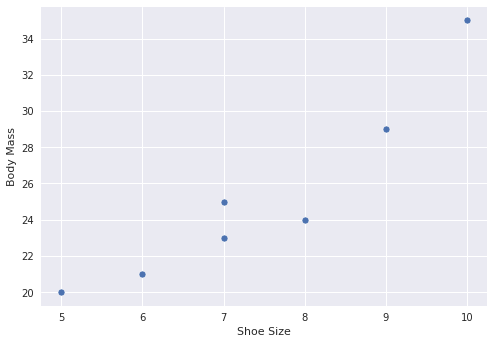

In [19]:
with plt.style.context('seaborn'):
    sns.scatterplot(x=shoe_size,y=body_mass,palette='inferno')
    plt.xlabel('Shoe Size')
    plt.ylabel('Body Mass')

In [20]:
[shoe_size[5],body_mass[5]], [shoe_size[4],body_mass[4]]

([5, 20], [6, 21])

#### **3.1.Euclidean_Distance**

In [21]:
eu_dist.pairwise([[shoe_size[5],body_mass[5]]], [[shoe_size[4],body_mass[4]]])

array([[1.41421356]])

#### **3.2.Manhattan_Distance**

In [22]:
man_hat_dist.pairwise([[shoe_size[5],body_mass[5]]], [[shoe_size[4],body_mass[4]]])

array([[2.]])

#### **3.3.Chebyshev_Distance**

In [23]:
chby_dist = DistanceMetric.get_metric('chebyshev')

In [24]:
chby_dist.pairwise([[shoe_size[5],body_mass[5]]], [[shoe_size[4],body_mass[4]]])

array([[1.]])

In [25]:
shoe_size.reshape((1,7)),body_mass.reshape((1,7))

(array([[ 7,  8,  9, 10,  6,  5,  7]]), array([[23, 24, 29, 35, 21, 20, 25]]))

In [26]:
chby_dist.pairwise(shoe_size.reshape((1,7)),body_mass.reshape((1,7))) ## 35 - 10 = 25 that is the max distance

array([[25.]])

#### **3.4.Mahalanobis_Distance**

In [27]:
body_data_df = pd.DataFrame({'shoe_size':shoe_size, 'body_mass':body_mass})

In [28]:
np.square(body_data_df.corr())

,shoe_size,body_mass
shoe_size,1.000000,0.879253
body_mass,0.879253,1.000000


In [29]:
np.square(np.corrcoef(shoe_size,body_mass))

array([[1.       , 0.8792535],
       [0.8792535, 1.       ]])

In [30]:
## Calculating Mahalanobis Distance ::: (X - mu) * inv(cov(X)) * (X - mu).T
x_min_mu = body_data_df - np.mean(body_data_df)
inv_cov_x = pd.DataFrame(scipy.linalg.inv(body_data_df.cov()))
x_min_mu_T = x_min_mu.T

In [31]:
x_min_mu.shape, inv_cov_x.shape, x_min_mu_T.shape

((7, 2), (2, 2), (2, 7))

In [32]:
mahanalobis_dists_matrix = pd.DataFrame(np.dot(np.dot(x_min_mu,inv_cov_x),x_min_mu_T))
mahanalobis_dists_matrix

,0,1,2,3,4,5,6
0,0.416337,0.875584,0.014185,-1.177375,0.287251,-0.171996,-0.243986
1,0.875584,2.705124,0.959986,-1.678823,-0.060287,-1.889828,-0.911756
2,0.014185,0.959986,1.002187,0.818488,-0.705715,-1.651516,-0.437615
3,-1.177375,-1.678823,0.818488,4.065489,-1.425616,-0.924168,0.322005
4,0.287251,-0.060287,-0.705715,-1.425616,0.709262,1.056800,0.138306
5,-0.171996,-1.889828,-1.651516,-0.924168,1.056800,2.774632,0.806076
6,-0.243986,-0.911756,-0.437615,0.322005,0.138306,0.806076,0.326970


In [33]:
np.diagonal(mahanalobis_dists_matrix)

array([0.41633666, 2.70512442, 1.00218689, 4.0654885 , 0.70926178,
       2.77463207, 0.32696968])

#### **CASE-IV**
##### **Working with DataFrame object**

##### Understood **`Mahalanobis Distance`** via link :: https://www.machinelearningplus.com/statistics/mahalanobis-distance/

In [34]:
filepath = 'https://raw.githubusercontent.com/selva86/datasets/master/diamonds.csv'
df = pd.read_csv(filepath).iloc[0:500, [0,4,6]]
df.shape, df.ndim, df.head()

((500, 3),
 2,
    carat  depth  price
 0   0.23   61.5    326
 1   0.21   59.8    326
 2   0.23   56.9    327
 3   0.29   62.4    334
 4   0.31   63.3    335)

In [36]:
def mahalanobis(x=None, data=None):
    """This function generates the Mahalanobis Distance"""
    x_min_mu = x - np.mean(data)
    cov = np.cov(data.values.T)
    inv_cov_x = scipy.linalg.inv(cov)
    first_term = np.dot(x_min_mu, inv_cov_x)
    mahal_dist = np.dot(first_term, x_min_mu.T)
    return mahal_dist.diagonal(), inv_cov_x

df_x = df[['carat', 'depth', 'price']].head(500)
df_x['mahala'],VI = mahalanobis(x=df_x, data=df[['carat', 'depth', 'price']])
df_x.head()

,carat,depth,price,mahala
0,0.23,61.5,326,3.766898
1,0.21,59.8,326,5.040171
2,0.23,56.9,327,11.473766
3,0.29,62.4,334,3.876022
4,0.31,63.3,335,4.661105


##### **Manual Calculation**

In [37]:
pd.DataFrame(((df - np.mean(df)).values @ scipy.linalg.inv(df.cov().values)) @ ((df - np.mean(df)).T).values).shape

(500, 500)

In [38]:
pd.DataFrame(((df - np.mean(df)).values @ scipy.linalg.inv(df.cov().values)) @ ((df - np.mean(df)).T).values)

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,3.766898,3.916408,3.985651,3.509290,3.396797,3.658189,3.682101,3.631782,3.615154,3.852411,...,-1.050648,-0.877226,-0.622280,-1.042334,-1.070403,-1.030892,-0.963937,-0.877226,-0.901139,-1.741025
1,3.916408,5.040171,6.724389,3.101321,2.465016,3.068993,3.374325,3.531883,1.749026,5.185921,...,-1.410516,0.018579,-0.652447,-0.519087,-1.270134,-1.550898,-0.695969,0.018579,-0.286753,-3.158284
2,3.985651,6.724389,11.473766,2.590670,1.152378,1.861321,2.675488,3.354030,-1.915498,7.378499,...,-2.302683,1.250222,-1.827926,0.332080,-1.799468,-2.805898,-0.526231,1.250222,0.436055,-4.643153
3,3.509290,3.101321,2.590670,3.876022,4.122082,3.776873,3.677306,3.664491,4.162841,3.059893,...,-1.102714,-1.610250,-1.599009,-1.351889,-1.127734,-1.077694,-1.356482,-1.610250,-1.510683,-0.159136
4,3.396797,2.465016,1.152378,4.122082,4.661105,4.052604,3.808965,3.714524,5.067003,2.338280,...,-0.959251,-2.134672,-1.774606,-1.635491,-1.053732,-0.864771,-1.546962,-2.134672,-1.891033,0.751059
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,-1.030892,-1.550898,-2.805898,-1.077694,-0.864771,-0.577531,-0.770679,-1.059940,0.449597,-1.818682,...,0.841224,0.128070,1.506881,0.086455,0.656987,1.025460,0.484647,0.128070,0.321217,0.229034
496,-0.963937,-0.695969,-0.526231,-1.356482,-1.546962,-1.124048,-1.076651,-1.143898,-1.233603,-0.745033,...,0.459676,0.775041,1.138503,0.504528,0.434705,0.484647,0.617359,0.775041,0.727644,-0.653359
497,-0.877226,0.018579,1.250222,-1.610250,-2.134672,-1.516238,-1.285177,-1.208840,-2.467239,0.113445,...,0.211608,1.338474,1.057637,0.840807,0.295147,0.128070,0.775041,1.338474,1.107413,-1.519558
498,-0.901139,-0.286753,0.436055,-1.510683,-1.891033,-1.321054,-1.175901,-1.178855,-1.866096,-0.270001,...,0.347875,1.107413,1.189201,0.691496,0.374533,0.321217,0.727644,1.107413,0.962261,-1.204418


### **So, good here as everything matched!!**

#### **CASE-V**
##### **Applying Mahalanobis Distance Metric on Breast Cancer**

In [40]:
cancer = load_breast_cancer()

In [41]:
cancer_df = pd.DataFrame(cancer.data,columns=cancer.feature_names)
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [42]:
y = pd.DataFrame(cancer.target,columns=['Label'])
y.head()

,Label
0,0
1,0
2,0
3,0
4,0


In [43]:
cancer_df = pd.concat([cancer_df,y],axis=1).copy(deep=True)
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [44]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [45]:
X_train, X_test, y_train, y_test = train_test_split(cancer_df.iloc[:, 0:-1],cancer_df['Label'],test_size=0.40,random_state=42,
                                                    stratify=cancer_df['Label'])

In [46]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((341, 30), (228, 30), (341,), (228,))

#### **Seggregating the positive and negative observations**

##### **Only positivies**

In [47]:
train_df = pd.concat([X_train,y_train],axis=1).copy(deep=True)
train_df_pos = train_df[train_df['Label']==1].copy(deep=True)
train_df_pos.shape

(214, 31)

In [48]:
train_df_pos.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Label
525,8.571,13.10,54.53,221.3,0.10360,0.07632,0.025650,0.015100,0.1678,0.07126,...,18.45,63.30,275.6,0.1641,0.22350,0.175400,0.08512,0.2983,0.10490,1
58,13.050,19.31,82.61,527.2,0.08060,0.03789,0.000692,0.004167,0.1819,0.05501,...,22.25,90.24,624.1,0.1021,0.06191,0.001845,0.01111,0.2439,0.06289,1
342,11.060,14.96,71.49,373.9,0.10330,0.09097,0.053970,0.033410,0.1776,0.06907,...,19.90,79.76,440.0,0.1418,0.22100,0.229900,0.10750,0.3301,0.09080,1
413,14.990,22.11,97.53,693.7,0.08515,0.10250,0.068590,0.038760,0.1944,0.05913,...,31.55,110.20,867.1,0.1077,0.33450,0.311400,0.13080,0.3163,0.09251,1
559,11.510,23.93,74.52,403.5,0.09261,0.10210,0.111200,0.041050,0.1388,0.06570,...,37.16,82.28,474.2,0.1298,0.25170,0.363000,0.09653,0.2112,0.08732,1


##### **Only negatives**

In [49]:
train_df_neg = train_df[train_df['Label']==0].copy(deep=True)
train_df_neg.shape

(127, 31)

In [50]:
train_df_neg.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Label
39,13.48,20.82,88.40,559.2,0.10160,0.12550,0.1063,0.05439,0.1720,0.06419,...,26.02,107.3,740.4,0.1610,0.4225,0.5030,0.2258,0.2807,0.10710,0
229,12.83,22.33,85.26,503.2,0.10880,0.17990,0.1695,0.06861,0.2123,0.07254,...,30.15,105.3,706.0,0.1777,0.5343,0.6282,0.1977,0.3407,0.12430,0
40,13.44,21.58,86.18,563.0,0.08162,0.06031,0.0311,0.02031,0.1784,0.05587,...,30.25,102.5,787.9,0.1094,0.2043,0.2085,0.1112,0.2994,0.07146,0
172,15.46,11.89,102.50,736.9,0.12570,0.15550,0.2032,0.10970,0.1966,0.07069,...,17.04,125.0,1102.0,0.1531,0.3583,0.5830,0.1827,0.3216,0.10100,0
213,17.42,25.56,114.50,948.0,0.10060,0.11460,0.1682,0.06597,0.1308,0.05866,...,28.07,120.4,1021.0,0.1243,0.1793,0.2803,0.1099,0.1603,0.06818,0


##### **Distance calculation for positive observations**

In [51]:
train_df_pos_mh_dist = ((train_df_pos.iloc[:,0:-1] - np.mean(train_df_pos.iloc[:,0:-1])).values\
                        @ scipy.linalg.inv(train_df_pos.iloc[:,0:-1].cov().values))\
@ ((train_df_pos.iloc[:,0:-1] - np.mean(train_df_pos.iloc[:,0:-1])).T).values

In [52]:
train_df_pos['mahal_dist'] = train_df_pos_mh_dist.diagonal()

In [53]:
train_df_pos.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Label,mahal_dist
525,8.571,13.10,54.53,221.3,0.10360,0.07632,0.025650,0.015100,0.1678,0.07126,...,63.30,275.6,0.1641,0.22350,0.175400,0.08512,0.2983,0.10490,1,25.772521
58,13.050,19.31,82.61,527.2,0.08060,0.03789,0.000692,0.004167,0.1819,0.05501,...,90.24,624.1,0.1021,0.06191,0.001845,0.01111,0.2439,0.06289,1,14.048632
342,11.060,14.96,71.49,373.9,0.10330,0.09097,0.053970,0.033410,0.1776,0.06907,...,79.76,440.0,0.1418,0.22100,0.229900,0.10750,0.3301,0.09080,1,15.908549
413,14.990,22.11,97.53,693.7,0.08515,0.10250,0.068590,0.038760,0.1944,0.05913,...,110.20,867.1,0.1077,0.33450,0.311400,0.13080,0.3163,0.09251,1,37.715504
559,11.510,23.93,74.52,403.5,0.09261,0.10210,0.111200,0.041050,0.1388,0.06570,...,82.28,474.2,0.1298,0.25170,0.363000,0.09653,0.2112,0.08732,1,28.900581


##### **Distance calculation for negative observations**

In [54]:
train_df_neg_mh_dist = ((train_df_neg.iloc[:,0:-1] - np.mean(train_df_neg.iloc[:,0:-1])).values\
                        @ scipy.linalg.inv(train_df_neg.iloc[:,0:-1].cov().values))\
@ ((train_df_neg.iloc[:,0:-1] - np.mean(train_df_neg.iloc[:,0:-1])).T).values

In [55]:
train_df_neg['mahal_dist'] = train_df_neg_mh_dist.diagonal()

In [56]:
train_df_neg.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Label,mahal_dist
39,13.48,20.82,88.40,559.2,0.10160,0.12550,0.1063,0.05439,0.1720,0.06419,...,107.3,740.4,0.1610,0.4225,0.5030,0.2258,0.2807,0.10710,0,30.536895
229,12.83,22.33,85.26,503.2,0.10880,0.17990,0.1695,0.06861,0.2123,0.07254,...,105.3,706.0,0.1777,0.5343,0.6282,0.1977,0.3407,0.12430,0,16.274117
40,13.44,21.58,86.18,563.0,0.08162,0.06031,0.0311,0.02031,0.1784,0.05587,...,102.5,787.9,0.1094,0.2043,0.2085,0.1112,0.2994,0.07146,0,18.579436
172,15.46,11.89,102.50,736.9,0.12570,0.15550,0.2032,0.10970,0.1966,0.07069,...,125.0,1102.0,0.1531,0.3583,0.5830,0.1827,0.3216,0.10100,0,23.159218
213,17.42,25.56,114.50,948.0,0.10060,0.11460,0.1682,0.06597,0.1308,0.05866,...,120.4,1021.0,0.1243,0.1793,0.2803,0.1099,0.1603,0.06818,0,104.139972


### **Hypothesis_Testing**

##### **Find Chi-square test Critical Value**

In [57]:
from scipy.stats import chi2
chi2.ppf((1-0.01), df=2)

9.21034037197618

##### **Find Chi-square P-Value**

In [58]:
1 - chi2.cdf(12.7,df=2)

0.0017467471362611064

#### **CASE-1**
##### **Only +ve observations**

#### **Here, first I'll perform the test on positive observations considering the `null hypothesis` as TRUE or POSITIVE and the `alternate hypothesis` as FALSE or negative.**

##### **Means,**
- **`Ho = All are positive observations`**
- **`Ha = All are not positive observations`**

In [59]:
dof = train_df_pos.iloc[:,0:-1].shape[1]-1
dof

30

In [60]:
c_val = chi2.ppf((1-0.01), df=dof)
c_val

50.89218131151707

#### **So, above is the critical value and if mahalanobis distance is greater than this value then we will reject the null hypothesis.**

In [61]:
train_df_pos['p_val'] = 1 - chi2.cdf(train_df_pos['mahal_dist'], df=dof)

In [62]:
train_df_pos.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Label,mahal_dist,p_val
525,8.571,13.10,54.53,221.3,0.10360,0.07632,0.025650,0.015100,0.1678,0.07126,...,275.6,0.1641,0.22350,0.175400,0.08512,0.2983,0.10490,1,25.772521,0.686690
58,13.050,19.31,82.61,527.2,0.08060,0.03789,0.000692,0.004167,0.1819,0.05501,...,624.1,0.1021,0.06191,0.001845,0.01111,0.2439,0.06289,1,14.048632,0.994108
342,11.060,14.96,71.49,373.9,0.10330,0.09097,0.053970,0.033410,0.1776,0.06907,...,440.0,0.1418,0.22100,0.229900,0.10750,0.3301,0.09080,1,15.908549,0.983504
413,14.990,22.11,97.53,693.7,0.08515,0.10250,0.068590,0.038760,0.1944,0.05913,...,867.1,0.1077,0.33450,0.311400,0.13080,0.3163,0.09251,1,37.715504,0.157192
559,11.510,23.93,74.52,403.5,0.09261,0.10210,0.111200,0.041050,0.1388,0.06570,...,474.2,0.1298,0.25170,0.363000,0.09653,0.2112,0.08732,1,28.900581,0.522824


In [63]:
train_df_pos.shape

(214, 33)

In [64]:
train_df_pos[train_df_pos['p_val'] < 0.01].shape

(26, 33)

In [65]:
rej_null_hyp = train_df_pos[train_df_pos['p_val'] < 0.01]['mahal_dist'].values
rej_null_hyp

array([ 81.02384852,  72.07114302,  52.08522329,  62.90183841,
        69.0939475 ,  66.10649304,  66.76169799,  76.36211933,
       118.79639287, 145.94310336,  59.52453926,  73.90722389,
        68.33222003,  96.34523381,  54.67357222, 154.13771741,
        76.20390925, 100.12061258,  74.13167215,  58.07212966,
       194.52697533,  54.58637054, 129.41505176,  60.14696292,
        89.70806506,  54.60903334])

In [66]:
rej_null_hyp.min(), rej_null_hyp.max()

(52.085223289182096, 194.5269753331549)

In [67]:
train_df_pos[train_df_pos['p_val'] >= 0.01]['mahal_dist'].min(), train_df_pos[train_df_pos['p_val'] >= 0.01]['mahal_dist'].max()

(6.167006044471601, 50.03579960395341)

#### **So, the null hypothesis got rejected based on the above 26 observations where the mahalanobis distance is greater than the critical value thus the distance ended up in the rejection region.**

#### **CASE-2**
##### **Only -ve observations**

#### **Now, I'll perform the test on negative observations considering the `null hypothesis` as FALSE or NEGATIVE and the `alternate hypothesis` as TRUE or POSITIVE.**

##### **Means,**
- **`Ho = All are negative observations`**
- **`Ha = All are not negative observations`**

In [68]:
train_df_neg['p_val'] = 1 - chi2.cdf(train_df_neg['mahal_dist'], df=dof)

In [69]:
train_df_neg.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Label,mahal_dist,p_val
39,13.48,20.82,88.40,559.2,0.10160,0.12550,0.1063,0.05439,0.1720,0.06419,...,740.4,0.1610,0.4225,0.5030,0.2258,0.2807,0.10710,0,30.536895,4.384197e-01
229,12.83,22.33,85.26,503.2,0.10880,0.17990,0.1695,0.06861,0.2123,0.07254,...,706.0,0.1777,0.5343,0.6282,0.1977,0.3407,0.12430,0,16.274117,9.803018e-01
40,13.44,21.58,86.18,563.0,0.08162,0.06031,0.0311,0.02031,0.1784,0.05587,...,787.9,0.1094,0.2043,0.2085,0.1112,0.2994,0.07146,0,18.579436,9.483792e-01
172,15.46,11.89,102.50,736.9,0.12570,0.15550,0.2032,0.10970,0.1966,0.07069,...,1102.0,0.1531,0.3583,0.5830,0.1827,0.3216,0.10100,0,23.159218,8.086583e-01
213,17.42,25.56,114.50,948.0,0.10060,0.11460,0.1682,0.06597,0.1308,0.05866,...,1021.0,0.1243,0.1793,0.2803,0.1099,0.1603,0.06818,0,104.139972,4.075721e-10


In [70]:
train_df_neg.shape

(127, 33)

In [71]:
train_df_neg[train_df_neg['p_val'] < 0.01].shape

(14, 33)

In [72]:
rej_null_hyp_neg = train_df_neg[train_df_neg['p_val'] < 0.01]['mahal_dist'].values
rej_null_hyp_neg

array([104.13997248,  65.26593056,  57.53158832,  74.66179609,
        55.42755962,  79.93825875,  52.30118131,  67.52958184,
        58.82178158,  52.2838042 ,  61.00788787, 102.21571179,
        60.01309311,  70.31700251])

In [73]:
rej_null_hyp_neg.min(), rej_null_hyp_neg.max()

(52.28380420063802, 104.13997248029511)

In [74]:
train_df_neg[train_df_neg['p_val'] >= 0.01]['mahal_dist'].min(), train_df_neg[train_df_neg['p_val'] >= 0.01]['mahal_dist'].max()

(8.361142675252562, 49.68938504959755)

#### **So, the null hypothesis got rejected based on the above 14 observations where the mahalanobis distance is greater than the critical value thus the distance ended up in the rejection region.**

#### **Calculate_Euclidean_Distance**
##### **Euclidean Distance :: It performs the pairwise difference and not takes the distribution into account.**

In [75]:
x1 = np.array([1,2,3,4,5])
x2 = np.array([5,6,7,8,9])

#### **Case-1**
##### **Self implementation**

In [97]:
def calc_euclidean_dist(vec1, vec2):
    """
    Description: This function is created for calculating the Euclidean Distance between 2 vectors.

    Input parameters : It accepts below 2 parameters:
        1. vec1 : np.array
            First vector
        2. vec2 : np.array
            Second vector
    
    Output : It returns the pandas dataframe with the input vectors and calculated Euclidean Distance
    """
    data_points = list(zip(x1,x2))
    point_a = data_points[0]
    distances = []
    for i in range(len(data_points)):
        euc_dist = np.sqrt(np.sum(np.square(np.array(data_points[0]) - np.array(data_points[i]))))
        distances.append(euc_dist)
    euc_df = pd.DataFrame({'vec1':vec1,'vec2':vec2,'euclidean_dist':distances})
    return euc_df

In [98]:
calc_euclidean_dist(x1,x2)

,vec1,vec2,euclidean_dist
0,1,5,0.000000
1,2,6,1.414214
2,3,7,2.828427
3,4,8,4.242641
4,5,9,5.656854


#### **Case-2**
##### **Using Scipy**

In [99]:
from scipy.spatial.distance import pdist, squareform

In [100]:
distances = pdist(pd.DataFrame({'x1':x1,'x2':x2}), metric='euclidean')
dist_matrix = pd.DataFrame(squareform(distances))

In [101]:
pd.DataFrame(dist_matrix.iloc[0:5,0])

,0
0,0.000000
1,1.414214
2,2.828427
3,4.242641
4,5.656854


#### **So, good here as the results matched!!**

## **Radius_Neighbors**

##### Reference Link of Fixed Nearest Neighbors :: 
- https://machinelearningmastery.com/radius-neighbors-classifier-algorithm-with-python/
- **Julia Blog** :: https://jaantollander.com/post/searching-for-fixed-radius-near-neighbors-with-cell-lists-algorithm/

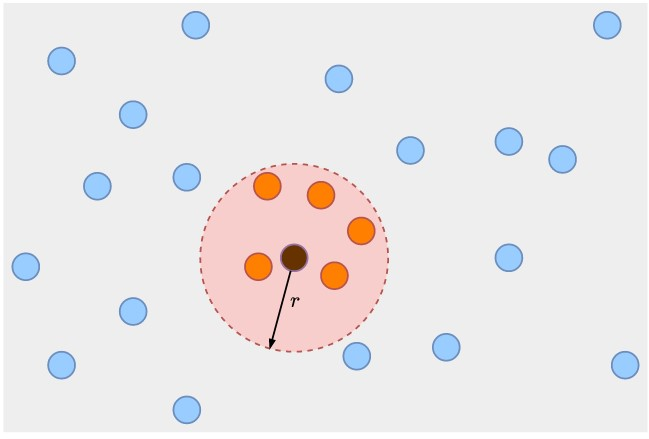

In [688]:
from IPython.display import Image
from IPython.core.display import HTML 

path = 'E:\STUDY\PROJECTS\AAIC_Practice\MODULES\Module_3\Mod_3_KNN\Refer_Notes\\'
Image(filename = path + "Fixed_NN.jpg", width=700, height=700)

- **RadiusNN is an extension of KNN and both are similar in a way of storing the entire train dataset in the training phase, however, they both uses the training dataset for prediction in a different manner.**

- **`Instead of locating the k-neighbors, the Radius Neighbors Classifier locates all examples in the training dataset that are within a given radius of the new example. The radius neighbors are then used to make a prediction for the new example.`**

- **The radius is defined in the feature space and generally assumes that the input variables are numeric and scaled to the range 0-1, e.g. normalized.**

- **Given a fixed radius, dense regions of the feature space will contribute more information and sparse regions will contribute less information. It is this latter case that is most desirable and it prevents examples very far in feature space from the new example from contributing to the prediction.**

- **The radius-based approach to locating neighbors is appropriate for those datasets where it is desirable for the contribution of neighbors to be proportional to the density of examples in the feature space.**

- **The Radius Neighbors Classifier may be more appropriate for prediction problems where there are sparse regions of the feature space.**

- **Given that the radius is fixed in all dimensions of the feature space, it will become less effective as the number of input features is increased, which causes examples in the feature space to spread further and further apart. This property is referred to as the curse of dimensionality.**

In [170]:
X_train, X_test, y_train, y_test = train_test_split(cancer_df.iloc[:,0:-1], cancer_df.iloc[:,-1], test_size=0.25,random_state=33)

In [171]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((426, 30), (143, 30), (426,), (143,))

In [205]:
from sklearn.preprocessing import MinMaxScaler

In [194]:
mms = MinMaxScaler()
mms.fit(X_train)
X_train_mms = mms.transform(X_train)
X_test_mms = mms.transform(X_test)

In [195]:
pd.DataFrame(X_train_mms).head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.636992,0.408184,0.622003,0.487593,0.287343,0.287467,0.229808,0.406952,0.281818,0.118155,...,0.582711,0.382463,0.551771,0.391958,0.406326,0.204044,0.215815,0.606529,0.205639,0.079716
1,0.284869,0.409537,0.302052,0.159618,0.642185,0.533157,0.435976,0.488918,0.651515,0.504002,...,0.268943,0.498667,0.277852,0.136183,0.654626,0.497531,0.430511,0.707904,0.554416,0.341388
2,0.108240,0.106865,0.122314,0.044624,1.000000,0.627323,0.228189,0.274543,0.665657,0.949031,...,0.083600,0.116205,0.092833,0.028264,0.786040,0.307371,0.167652,0.352234,0.290221,0.459584
3,0.334091,0.212039,0.317808,0.198388,0.218753,0.121373,0.082880,0.153894,0.330303,0.189975,...,0.274991,0.254797,0.252951,0.138812,0.319157,0.094993,0.089217,0.256117,0.228509,0.112483
4,0.519144,0.348326,0.486559,0.355673,0.213202,0.146739,0.171037,0.292525,0.539899,0.006108,...,0.450018,0.421375,0.392400,0.264402,0.237932,0.090142,0.179633,0.407216,0.653785,0.038742


In [200]:
np.unique(y_train), np.bincount(y_train)

(array([0, 1]), array([158, 268], dtype=int64))

In [196]:
pd.DataFrame(X_test_mms).head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.550381,0.356442,0.541151,0.403181,0.316087,0.267530,0.349437,0.404130,0.321717,0.148062,...,0.475987,0.406183,0.445690,0.299302,0.413590,0.178916,0.275240,0.512027,0.152800,0.124762
1,0.210564,0.257017,0.206413,0.107953,0.462781,0.231520,0.047631,0.097282,0.295455,0.329823,...,0.172536,0.392857,0.160616,0.078107,0.463118,0.147384,0.061565,0.220000,0.200710,0.169085
2,0.197785,0.395671,0.187686,0.100445,0.389434,0.123919,0.021001,0.056247,0.280303,0.241786,...,0.157595,0.450426,0.143682,0.067047,0.376610,0.081022,0.028610,0.147973,0.277997,0.105194
3,0.373373,0.355090,0.361620,0.227953,0.330657,0.196522,0.160038,0.258808,0.215657,0.158382,...,0.287442,0.438699,0.266398,0.147070,0.333025,0.108188,0.135783,0.349485,0.158320,0.070786
4,0.375740,0.176530,0.363900,0.230498,0.183071,0.202779,0.129902,0.168374,0.316667,0.141744,...,0.329064,0.165245,0.306738,0.177300,0.233309,0.244307,0.251677,0.394158,0.221215,0.180708


#### **Case:1**
##### **Radius is larger than 1**

In [257]:
rnc1 = RadiusNeighborsClassifier(radius=3,n_neighbors=5,weights='uniform',algorithm='kd_tree',
                                leaf_size=30,p=2,metric='minkowski',outlier_label=0)
rnc1.fit(X_train_mms, y_train)
print(rnc1.predict(pd.DataFrame(X_test_mms)))
print(rnc1.score(pd.DataFrame(X_test_mms),y_test))

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
0.6223776223776224


#### **Here, as the dominating class is 1 thus with a radius of 3 we are considering the entire training dataset to label the test dataset. Hence, all are labelled as 1 because all the training points are inside the radius of 3.**

#### **Case:2**
##### **Different values of Radius and Nearest Neighbors**

#### ***`NOTE :: I'm making an assumption here that is if the nearest neighbors of a point are not found within the given radius then it will be marked as -ve i.e. 0.`***

In [288]:
k = [7,9,11,13,15]
radius = [0.8,0.9,1.0,1.2,1.5]
for idx,(n,r) in enumerate(list(zip(k,radius))):
    print("\n### Run -- {} with Nearest Neighbors -- {} and Radius -- {} ###".format(idx+1,n,r))
    rnc1 = RadiusNeighborsClassifier(radius=r,n_neighbors=n,weights='uniform',algorithm='kd_tree',
                                leaf_size=15,p=2,metric='minkowski',outlier_label=0)
    rnc1.fit(X_train_mms, y_train)
    print(rnc1.predict(pd.DataFrame(X_test_mms)))
    print("Accuracy Score is {}".format(np.round(rnc1.score(pd.DataFrame(X_test_mms),y_test),3)))


### Run -- 1 with Nearest Neighbors -- 7 and Radius -- 0.8 ###
[0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 0 1 1 1 0 0 0 1 1 1 1 1 1 1 1 0 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 0 0 1 0 1 1 1 1 1 0 1 1 1 0
 0 0 0 0 0 1 0 1 1 0 1 0 1 0 1 1 1 0 0 1 0 1 1 0 1 1 0 1 1 1 1 0 1 0 1 0 1
 0 1 0 1 1 0 1 0 0 1 0 1 1 0 0 1 1 0 1 1 1 1 1 1 0 1 0 1 1 1 0 0]
Accuracy Score is 0.944

### Run -- 2 with Nearest Neighbors -- 9 and Radius -- 0.9 ###
[0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 0 0 1 0 1 1 1 1 1 0 1 1 1 0
 0 0 0 0 0 1 0 1 1 0 1 0 1 0 1 1 1 0 0 1 0 1 1 0 1 1 0 1 1 1 1 0 1 0 1 0 1
 0 1 0 1 1 0 1 0 0 1 1 1 1 0 0 1 1 0 1 1 1 1 1 1 0 1 0 1 1 1 0 0]
Accuracy Score is 0.923

### Run -- 3 with Nearest Neighbors -- 11 and Radius -- 1.0 ###
[0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 0 0 1 0 1 1 1 1 1 0 1 1 1 0
 0 1 0 1 0 1 0 1 1 0 1 0 1 

#### **So, the accuracy is clearly dropping down with the increase in radius.**

#### **NN_Distances_and_Indices**
##### **Distance to every Nearest Neighbor and their indices**

- **The `Radius Neighbors` function finds the neighbors within a given radius of a point or points.**
- **It return the indices and distances of each point from the dataset lying in a ball with size ``radius`` around the points of the query array. Points lying on the boundary are included in the results.**
- **The result points are *not* necessarily sorted by distance to their query point.**

In [292]:
distances_to_each_nn, indices_of_nn = rnc1.radius_neighbors(X_test_st,radius=0.8)

In [293]:
distances_to_each_nn.shape, indices_of_nn.shape

((143,), (143,))

#### **So, till now we are good because 143 data points exist in the test dataset.**

In [294]:
X_test_st[0]

array([0.55038099, 0.35644234, 0.54115127, 0.40318134, 0.31608683,
       0.2675296 , 0.34943715, 0.40412964, 0.32171717, 0.14806234,
       0.26847728, 0.32903112, 0.22970362, 0.16133929, 0.30720332,
       0.18752065, 0.12830808, 0.36200038, 0.18815124, 0.11477551,
       0.47598719, 0.40618337, 0.44568953, 0.29930201, 0.41359044,
       0.1789155 , 0.27523962, 0.51202749, 0.15279968, 0.12476197])

In [297]:
len(distances_to_each_nn[0])

107

#### **Here, the first point in the test dataset has 107 Radius Nearest Neighbors.**

In [298]:
distances_to_each_nn[0]

array([0.77485119, 0.79928181, 0.75381767, 0.70104903, 0.78250427,
       0.66317849, 0.663835  , 0.59951726, 0.73479384, 0.63464298,
       0.68966113, 0.73084904, 0.75086833, 0.76285138, 0.60855405,
       0.7042115 , 0.65302504, 0.77355881, 0.7643015 , 0.69141421,
       0.50073962, 0.64050169, 0.72027237, 0.72954823, 0.7175256 ,
       0.70404708, 0.56169357, 0.61452768, 0.62009898, 0.61641988,
       0.7451911 , 0.63563298, 0.58947877, 0.6019377 , 0.52353405,
       0.53506146, 0.61081914, 0.62331693, 0.52414384, 0.52262196,
       0.72080903, 0.46332191, 0.60930924, 0.44142947, 0.60589131,
       0.45932364, 0.6261524 , 0.40951519, 0.60013706, 0.44445524,
       0.74071954, 0.43127356, 0.49096904, 0.77621701, 0.56782249,
       0.66669249, 0.6931883 , 0.55817302, 0.62487651, 0.78417201,
       0.56344947, 0.77031498, 0.73625407, 0.72129064, 0.72113906,
       0.63343834, 0.78740412, 0.57786836, 0.74541704, 0.7393466 ,
       0.39731962, 0.77010967, 0.74216385, 0.68700304, 0.72430

#### **Above are the distances of first test point to its 107 Radius Nearest Neighbors.**

In [296]:
indices_of_nn[0]

array([ 35,  93, 168, 294, 298,  27,  98, 354, 193, 407, 166, 151, 109,
        59,  14,  26,  57, 148, 248,  44, 423, 130, 323, 310, 341, 165,
       378, 229, 351,  30,  52, 223, 270, 120, 226, 283,  78,  94, 140,
        54, 314, 333, 318, 102, 107,   0, 144,  43,  36, 312, 376, 306,
        58, 234, 345, 297, 254, 338, 179, 105, 260, 128, 125, 370, 220,
       307, 422, 377, 389, 143, 126,  15, 190,  18, 204,  45, 295, 189,
        74, 181, 369, 374, 121,  28, 247,  75,  24, 340, 394, 324, 408,
       208, 316, 116, 327,  95, 183, 246, 110, 404,  13, 343, 360,  37,
       170, 296, 319], dtype=int64)

#### **Above are the training data points indices of first test point 107 Radius Nearest Neighbors.**

In [302]:
pd.DataFrame(X_train_mms[indices_of_nn[0],:])

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.291495,0.373013,0.291549,0.166872,0.240262,0.274584,0.254456,0.183481,0.253535,0.215670,...,0.244397,0.358209,0.251457,0.123845,0.422175,0.317849,0.359744,0.405842,0.196569,0.174207
1,0.385205,0.235712,0.380001,0.243097,0.260184,0.234648,0.177064,0.213225,0.269697,0.208509,...,0.350053,0.219083,0.335126,0.197675,0.514627,0.296698,0.265735,0.430241,0.364550,0.277037
2,0.441053,0.202570,0.420911,0.286872,0.314798,0.146433,0.129597,0.238526,0.328788,0.139217,...,0.334045,0.152985,0.295782,0.182609,0.424156,0.105568,0.155511,0.466323,0.144716,0.112220
3,0.413129,0.142712,0.402253,0.262227,0.318267,0.230783,0.167331,0.310141,0.381818,0.153117,...,0.340448,0.192697,0.318193,0.181282,0.337648,0.162616,0.136502,0.472165,0.228115,0.101779
4,0.381419,0.237741,0.379656,0.231559,0.359996,0.358935,0.181074,0.321066,0.307071,0.394482,...,0.314123,0.224147,0.295284,0.165086,0.279535,0.184640,0.148243,0.349828,0.120465,0.198831
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,0.475129,0.482584,0.476885,0.320594,0.566855,0.399423,0.566839,0.628855,0.600000,0.291912,...,0.460690,0.534915,0.426764,0.284801,0.609060,0.318819,0.446326,0.634708,0.387224,0.194432
103,0.364854,0.144403,0.376132,0.217434,0.402319,0.503711,0.340056,0.329326,0.518182,0.507582,...,0.303451,0.168443,0.317197,0.153362,0.396421,0.326193,0.257109,0.380756,0.248620,0.242104
104,0.383312,0.542103,0.374611,0.243097,0.395381,0.240200,0.289634,0.342551,0.296465,0.309183,...,0.376379,0.565032,0.352557,0.212544,0.626230,0.202103,0.321805,0.524399,0.214511,0.257207
105,0.439159,0.411566,0.440260,0.289841,0.535137,0.334090,0.421904,0.417198,0.408586,0.323505,...,0.348630,0.351546,0.315205,0.194160,0.471703,0.178818,0.267093,0.359794,0.230678,0.159695


#### **Above are the 107 Radius Nearest Neighbors of first test point from training data.**

### **KNN**
##### **Using pre-computed Mahalanobis Distance**

#### ***`NOTE :: Sklearn implementation expects the distances to be +ve valued when using metric as 'precomputed' and algorithm also should be set as 'auto' or 'ball_tree'.`***

In [643]:
cancer_pre_comp = pd.DataFrame(cancer.data,columns=cancer.feature_names)
cancer_pre_comp_y = cancer.target
cancer_pre_comp.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [644]:
cancer_pre_comp.shape, cancer_pre_comp_y.shape

((569, 30), (569,))

In [645]:
cancer_pre_comp_mahala = np.dot(np.dot((cancer_pre_comp - cancer_pre_comp.mean()),scipy.linalg.inv(cancer_pre_comp.cov())),
                                (cancer_pre_comp - cancer_pre_comp.mean()).T)

cancer_pre_comp_mahala = np.square(pd.DataFrame(cancer_pre_comp_mahala))
cancer_pre_comp_mahala.shape

(569, 569)

In [577]:
cancer_pre_comp_mahala.head()

,0,1,2,3,4,5,6,7,8,9,...,559,560,561,562,563,564,565,566,567,568
0,8546.335317,217.013675,44.919530,221.166696,38.085944,78.517852,1.480728,0.001700,56.781209,294.259693,...,29.117099,124.330720,17.073991,3.005635,227.759297,155.022400,53.660826,209.751168,500.498869,62.169825
1,217.013675,1320.319427,13.357036,30.453245,27.211435,44.175538,144.354281,117.855969,143.087941,19.378655,...,81.923149,2.480059,76.044445,275.310078,2.859145,46.867769,4.692703,1.661354,253.960333,73.731489
2,44.919530,13.357036,555.204880,340.240745,8.547820,17.050733,17.587972,0.760843,105.741951,23.333257,...,39.740936,3.217149,20.497976,53.366196,33.927606,324.595525,11.018575,2.903173,0.025573,0.465489
3,221.166696,30.453245,340.240745,12586.119449,347.417854,370.360081,32.206953,162.945973,296.481382,311.063107,...,69.812071,7.157341,0.073780,317.955698,76.504651,12.054075,10.398115,114.662743,375.978392,18.100875
4,38.085944,27.211435,8.547820,347.417854,717.905001,3.477353,9.061761,1.978279,65.744538,0.227664,...,31.012196,12.607838,110.235593,38.506831,193.734088,97.526327,14.566005,6.908617,1.764818,11.744336


In [674]:
knc = KNeighborsClassifier(n_neighbors=9,weights='distance',algorithm='brute',metric='precomputed')

In [675]:
knc.fit(cancer_pre_comp_mahala,cancer_pre_comp_y)

KNeighborsClassifier(algorithm='brute', metric='precomputed', n_neighbors=9,
                     weights='distance')

In [676]:
dists, indxs = knc.kneighbors(cancer_pre_comp_mahala,n_neighbors=9)

In [677]:
dists[34], indxs[34]

(array([2.79474991e-05, 1.65500188e-04, 2.62864771e-04, 5.28682818e-04,
        5.34360407e-04, 5.62853142e-04, 6.25889956e-04, 1.91934304e-03,
        2.30086972e-03]),
 array([173, 271, 144, 334, 331,  28, 475, 359, 153], dtype=int64))

In [678]:
cancer_pre_comp_mahala.iloc[34,173],cancer_pre_comp_mahala.iloc[34,271],cancer_pre_comp_mahala.iloc[34,144],cancer_pre_comp_mahala.iloc[34,334],\
cancer_pre_comp_mahala.iloc[34,331],cancer_pre_comp_mahala.iloc[34,28],cancer_pre_comp_mahala.iloc[34,475]

(2.7947499113078438e-05,
 0.00016550018833273196,
 0.0002628647705171907,
 0.0005286828181794098,
 0.0005343604065472748,
 0.0005628531423005402,
 0.0006258899556841858)

In [679]:
cnts = []
for idx in indxs[34]:
    cnts.append(cancer_pre_comp_y[idx])

print(cnts)
if cnts.count(0) > cnts.count(1):
    print("Prediction is :: Non Cancerous")
else:
    print("Prediction is :: Cancerous")

[1, 1, 1, 1, 1, 0, 1, 1, 1]
Prediction is :: Cancerous


In [680]:
knc.predict(np.array(cancer_pre_comp_mahala.iloc[34,:]).reshape(1,-1))

array([1])

In [681]:
knc.predict_proba(np.array(cancer_pre_comp_mahala.iloc[34,:]).reshape(1,-1))

array([[0.03307214, 0.96692786]])

#### **When we are using the precomputed distance matrix then 'predict' and 'predict_proba' function accepts test data input in the shape of (number of test observations, number of train data observations). For example, if we are trying ot test only 1 new unseen observation and used 569 training observations then the expected shape is (1,569).**

### **Conclusion**

1. **We can use Radius or Fixed Neighbors when we want to give weightage only to the nearby points within fixed distance.**
2. **We can use Radius or Fixed Neighbors to find the outliers if we are sure that points outside of a particular radius are outliers. This can give better results with data of high sparcity.**
3. **With Radius NN the features needs to be normalized. And, we can calculate the distances and indices of NN using `Nearest_neighbors` function.**
4. **The time and space complexity looks to be same for both Radius NN and KNN, its just that we can get better results using Radius NN if we want to find the neighbors only in close proximity.**
5. **If we are using `metric == 'precomputed'` then in sklearn only `'brute'` algorithm is supported otherwise select `'auto'`. Make sure the shape of test set would be (n_test , n_train).**
6. **With KNN we can compute the NN distances and their indices using `kneighbors` function.**